In [15]:
import pandas as pandas
import numpy as numpy
#import polars as pl
from sklearn import preprocessing
from sklearn import utils
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
#championspl = pl.read_csv('datasets/Combined Traits.csv')
champions = pandas.read_csv('datasets/Combined Traits.csv')

# Set the display option to show all rows
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)

# Display all rows of the dataframe
print(champions)

               name releasedate  popularity_spot  popularity  winrate  \
0            Aatrox   13/6/2013               17       0.107    0.495   
1              Ahri  14/12/2011               32       0.085    0.510   
2             Akali   11/5/2010               46       0.072    0.493   
3            Akshan   22/7/2021              162       0.017    0.486   
4           Alistar   21/2/2009               77       0.050    0.490   
5             Amumu   26/6/2009               24       0.094    0.534   
6            Anivia   10/7/2009              148       0.025    0.527   
7             Annie   21/2/2009              158       0.018    0.510   
8          Aphelios  11/12/2019              107       0.040    0.468   
9              Ashe   21/2/2009               16       0.108    0.496   
10     Aurelion Sol   24/3/2016              121       0.035    0.520   
11           Aurora   17/7/2024              106       0.040    0.483   
12             Azir   16/9/2014              140   

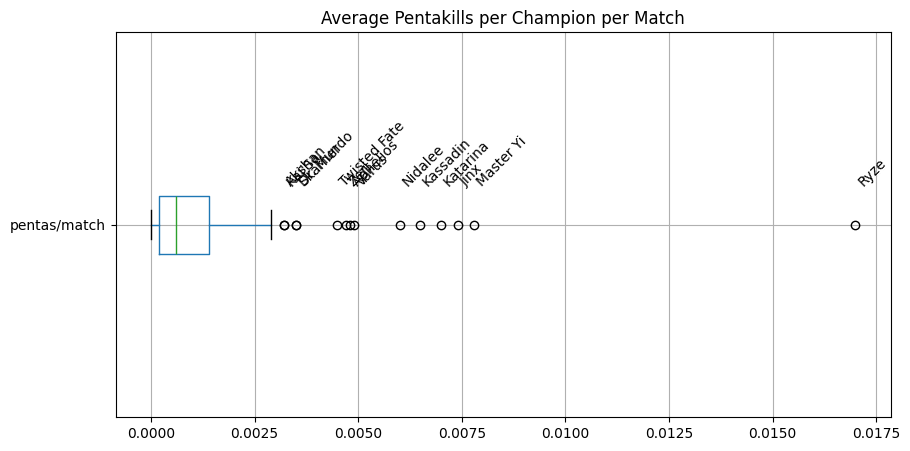

In [13]:
plot.figure(figsize=(10, 5))
plot.title('Average Pentakills per Champion per Match')

boxplot = champions.boxplot(column=['pentas/match'], vert=False)

Q1 = champions['pentas/match'].quantile(0.25)
Q3 = champions['pentas/match'].quantile(0.75)
IQR = Q3 - Q1
outliers = champions[(champions['pentas/match'] < (Q1 - 1.5 * IQR)) | (champions['pentas/match'] > (Q3 + 1.5 * IQR))]

for i in range(outliers.shape[0]):
    plot.annotate(outliers['name'].iloc[i],
                  xy=(outliers['pentas/match'].iloc[i], 1),
                  xytext=(outliers['pentas/match'].iloc[i], 1.1),
                  rotation=45)
    
plot.show()

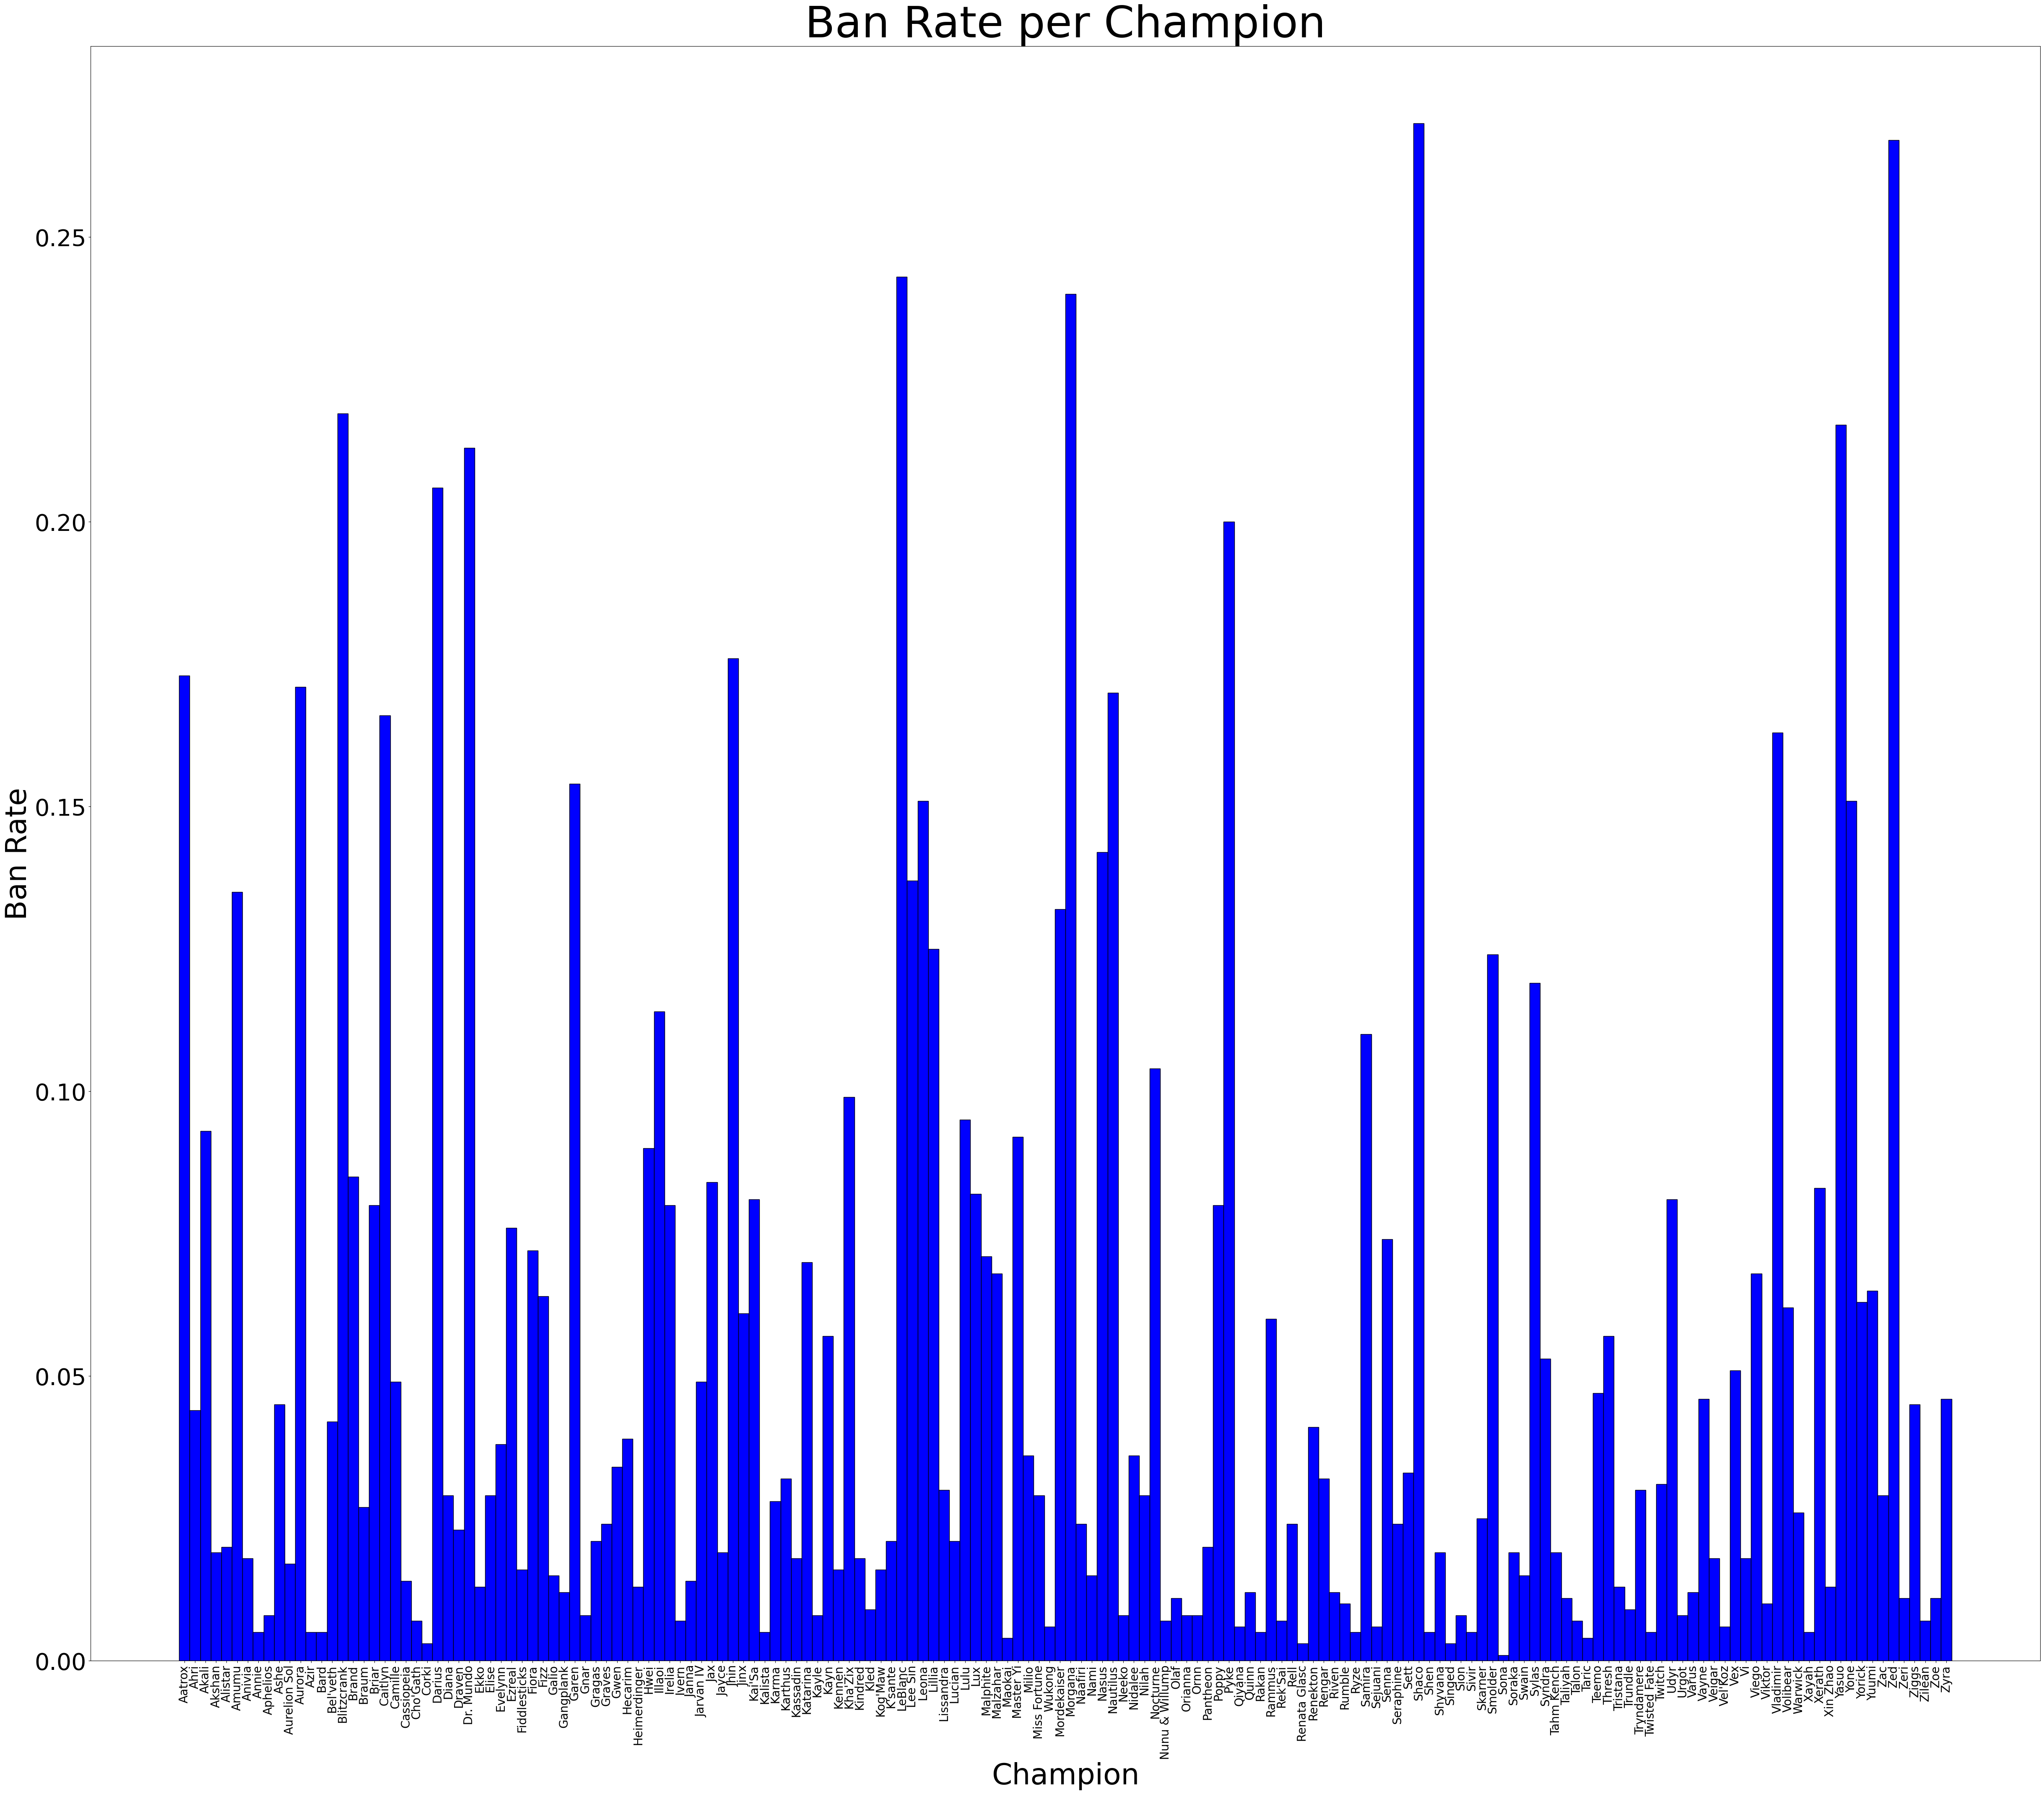

In [16]:
plot.figure(figsize=(60, 50))
plot.bar(champions['name'], champions['banrate'], color='blue', edgecolor='black', width=1)

plot.title('Ban Rate per Champion', fontsize=75)
plot.xlabel('Champion', fontsize=50)
plot.ylabel('Ban Rate', fontsize=50)
plot.xticks(rotation=90, fontsize=20)
plot.yticks(fontsize=40)

plot.show()

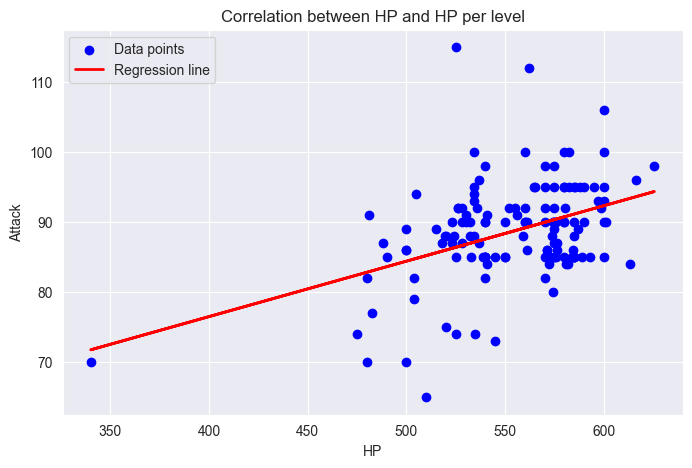

In [15]:
champions = champions.dropna()

x = champions['hp'].values.reshape(-1, 1)
y = champions['hpperlevel'].values

plot.figure(figsize=(8, 5))
plot.scatter(x, y, color='blue', label='Data points')

regressor = LinearRegression()
regressor.fit(x, y)
y_pred = regressor.predict(x)

plot.plot(x, y_pred, color='red', linewidth=2, label='Regression line')

plot.xlabel('HP')
plot.ylabel('Attack')
plot.title('Correlation between HP and HP per level')
plot.legend(loc='upper left')
plot.grid(True)

plot.show()

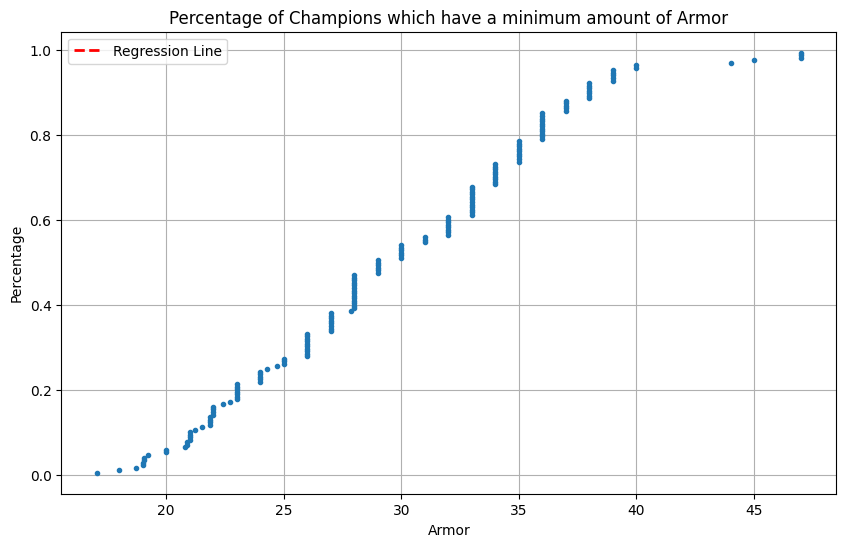

In [5]:
armorSorted = champions['armor'].sort_values()

cdf = numpy.arange(1, len(armorSorted) + 1) / len(armorSorted)

slope, intercept, r_value, p_value, std_err = linregress(armorSorted, cdf)

regressionLine = slope * armorSorted + intercept

plot.figure(figsize=(10, 6))
plot.plot(armorSorted, cdf, marker='.', linestyle='none')
plot.plot(armorSorted, regressionLine, label='Regression Line', linestyle='--', linewidth=2, color='red')
plot.xlabel('Armor')
plot.ylabel('Percentage')
plot.title('Percentage of Champions which have a minimum amount of Armor')
plot.legend()
plot.grid(True)
plot.show()

In [10]:
X1=champions[["popularity", "winrate"]]
y1=champions['banrate']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

modelforest = RandomForestRegressor(random_state=42)
modelforest.fit(X1_train, y1_train)
modellin = LinearRegression()
modellin.fit(X1_train, y1_train)

# Step 7: Predict the target values
y1_predlin = modellin.predict(X1_test)
y1_predforest = modelforest.predict(X1_test)
# Step 8: Evaluate the model
mselin = mean_squared_error(y1_test, y1_predlin)
meseforest=mean_squared_error(y1_test, y1_predforest)
print(f"Linear regression Error: {mselin} \n Random Forest Error: {meseforest}")

Linear regression Error: 0.0030041346327067415 
 Random Forest Error: 0.0036227596405771314


In [ ]:
X2=champions[["banrate", "winrate","difficulty"]]
y2=champions['pentas/match']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

modelforest = RandomForestRegressor(random_state=42)
modelforest.fit(X2_train, y2_train)
modellin = LinearRegression()
modellin.fit(X2_train, y2_train,)

# Step 7: Predict the target values
y2_predlin = modellin.predict(X2_test)
y2_predforest = modelforest.predict(X2_test)
# Step 8: Evaluate the model
mselin = mean_squared_error(y2_test, y2_predlin)
meseforest=mean_squared_error(y2_test, y2_predforest)
print(f"Logistic regression Error: {mselin} \n Random Forest Error: {meseforest}")